## Extreme Concurrency (`extreme_test`)
*Goal.*  Measure how throughput and tail-latency scale as we double the worker count while keeping per-peer memory generous (32 MB) and injecting a
15 % ghost-read stream plus a quarter of writes with short TTLs.  
*Hypothesis.*  Throughput improves sub-linearly past 8 workers; p95 latency rises sharply once thread contention saturates socket pools; evictions stay low thanks to ample memory.



▶ Stage: 2 workers × 400 req
{
  "workers": 2,
  "reqs": 400,
  "ops": 1600,
  "dur": 1.486109208984999,
  "thr": 1076.6368920442849,
  "lat_avg": 1783.3000063157895,
  "lat_p95": 2815.541,
  "hits": 546,
  "misses": 79,
  "hit_rate": 0.8736,
  "evictions": 0,
  "bytes": 26265380
}

▶ Stage: 4 workers × 800 req
{
  "workers": 4,
  "reqs": 800,
  "ops": 6400,
  "dur": 4.876735041994834,
  "thr": 1312.3534382917946,
  "lat_avg": 3012.2952461964037,
  "lat_p95": 3945.875,
  "hits": 2187,
  "misses": 397,
  "hit_rate": 0.8463622291021672,
  "evictions": 0,
  "bytes": 104897800
}

▶ Stage: 8 workers × 200 req
{
  "workers": 8,
  "reqs": 200,
  "ops": 3200,
  "dur": 2.780022958002519,
  "thr": 1151.0696308419122,
  "lat_avg": 6845.4854903514815,
  "lat_p95": 11324.333,
  "hits": 1126,
  "misses": 176,
  "hit_rate": 0.8648233486943164,
  "evictions": 0,
  "bytes": 131162960
}

▶ Stage: 16 workers × 100 req
{
  "workers": 16,
  "reqs": 100,
  "ops": 3200,
  "dur": 2.4966304169793148,
  "thr":

/Users/priyanshumehta/summer/internetsystems/peercache/testing/benchmark.py:295: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


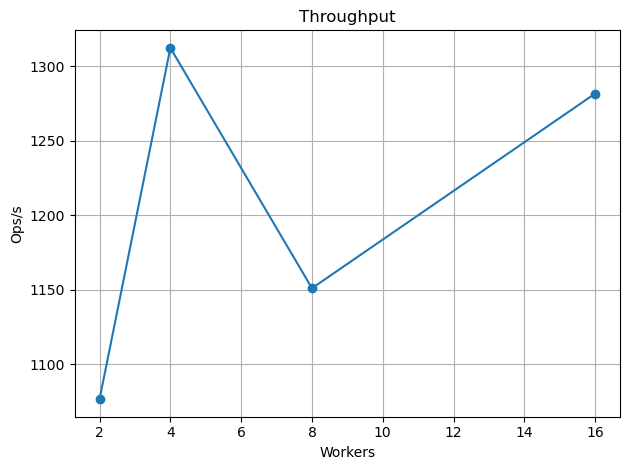

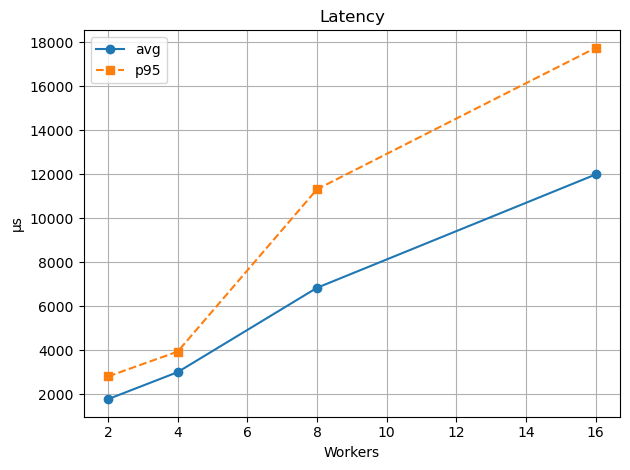

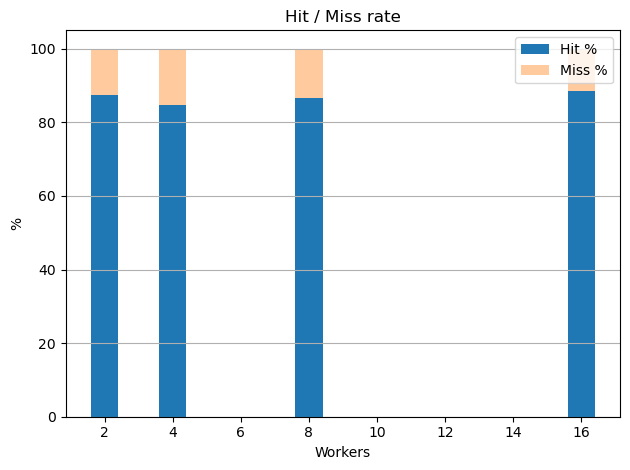

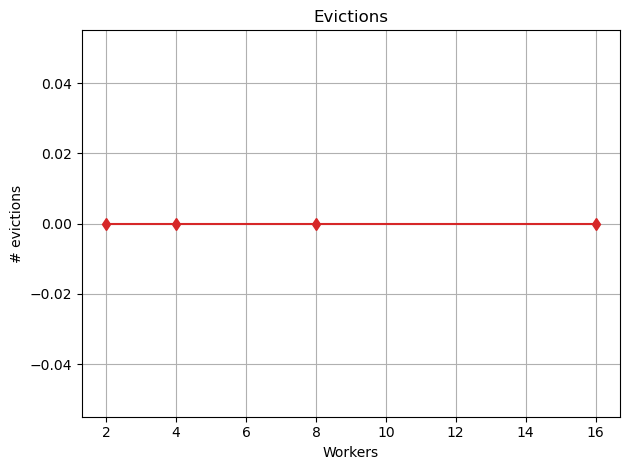

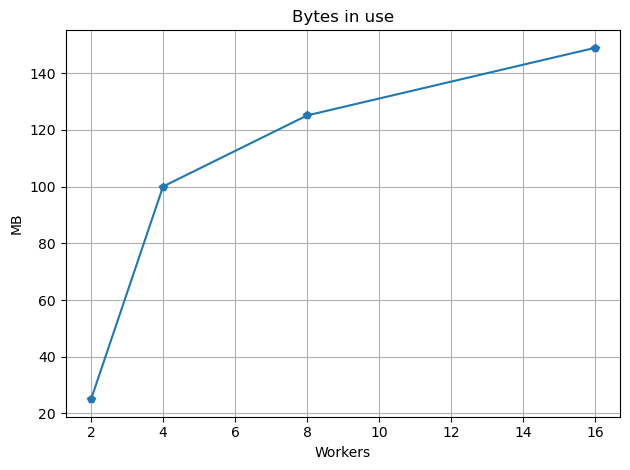

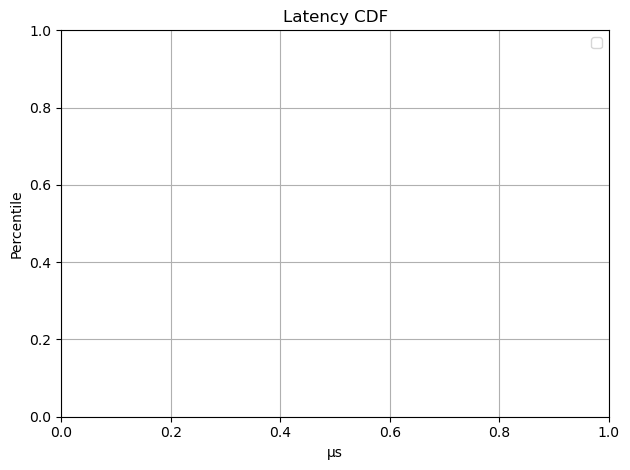

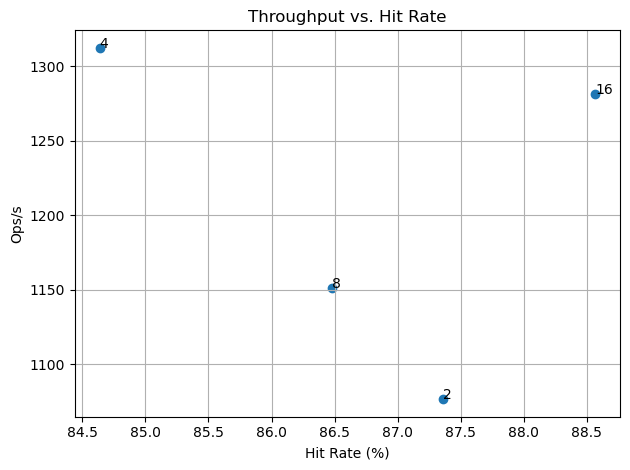

💾 Saving results to → results/simulations/extreme_test_20250607_042540.json
🔖 Results saved → results/simulations/extreme_test_20250607_042540.json
Cleaned up all peers and networks.


In [1]:
from testing.benchmark import run_benchmark
run_benchmark(
    name="extreme_test",
    peers=8,
    memory_mb=32,
    value_size=16_384,
    ghost_ratio=0.15,
    ttl_ratio=0.25,
    scenarios=[(2, 400), (4, 800), (8, 200), (16, 100)],
    seed=42,
    plot=True,
)
!pkill -f memcached && rm -rf state/peer/*.json state/network/*.json && echo "Cleaned up all peers and networks."

## Read-Heavy Ideal Cache (`read_heavy`)
*Goal.*  Establish a “best-case” baseline where the cache should achieve near-perfect hit rate: zero ghost requests and no expirations.  
*Hypothesis.*  Hit-rate ≈ 100 % for the first stage, minimal evictions, and latency dominated purely by Memcached’s in-RAM look-up time.



▶ Stage: 4 workers × 1000 req
{
  "workers": 4,
  "reqs": 1000,
  "ops": 8000,
  "dur": 6.204775916994549,
  "thr": 1289.329398357228,
  "lat_avg": 3089.9429503526485,
  "lat_p95": 4407.208,
  "hits": 3231,
  "misses": 0,
  "hit_rate": 1.0,
  "evictions": 0,
  "bytes": 131327560
}

▶ Stage: 8 workers × 2000 req
{
  "workers": 8,
  "reqs": 2000,
  "ops": 32000,
  "dur": 24.074744333018316,
  "thr": 1329.1937624489021,
  "lat_avg": 5983.064293983086,
  "lat_p95": 8352.042,
  "hits": 6251,
  "misses": 6601,
  "hit_rate": 0.4863834422657952,
  "evictions": 10339,
  "bytes": 252090150
}

🔧 Configuration:
{
  "name": "read_heavy",
  "peers": 8,
  "memory_mb": 32,
  "value_size": 16384,
  "ghost_ratio": 0.0,
  "ttl_ratio": 0.0,
  "scenarios": [
    [
      4,
      1000
    ],
    [
      8,
      2000
    ]
  ],
  "seed": 42
}
🖼️ Saved plot → results/plots/read_heavy_throughput.png
🖼️ Saved plot → results/plots/read_heavy_latency.png
🖼️ Saved plot → results/plots/read_heavy_hit_miss.png
🖼️ 

/Users/priyanshumehta/summer/internetsystems/peercache/testing/benchmark.py:295: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


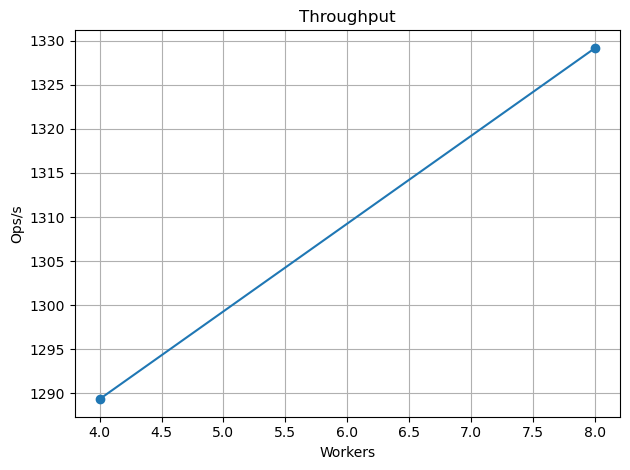

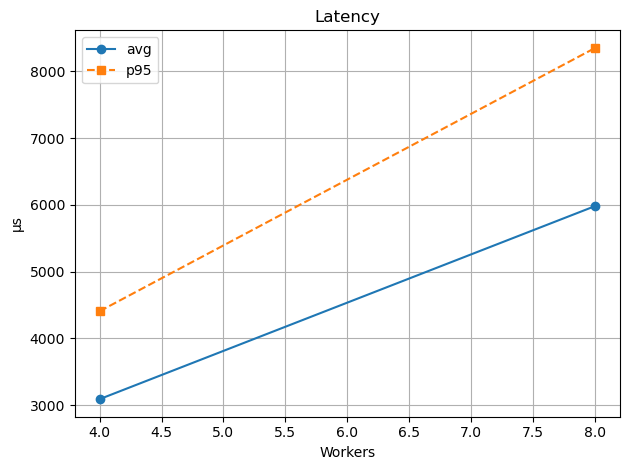

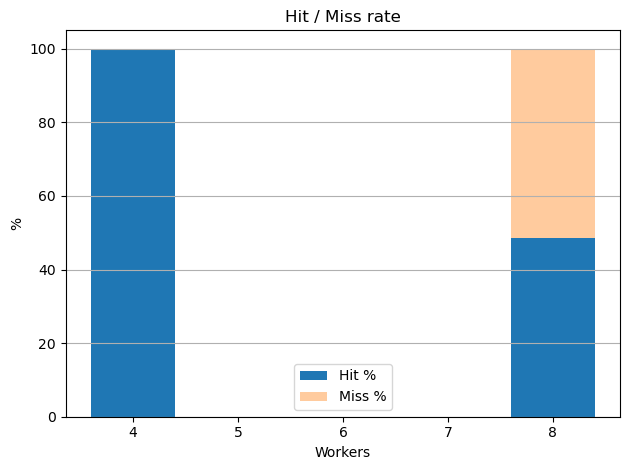

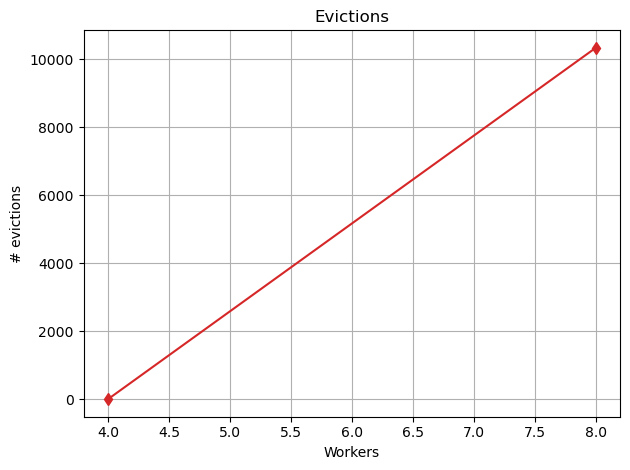

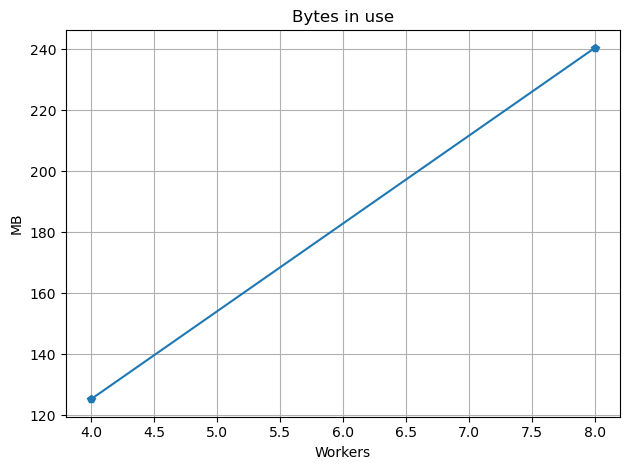

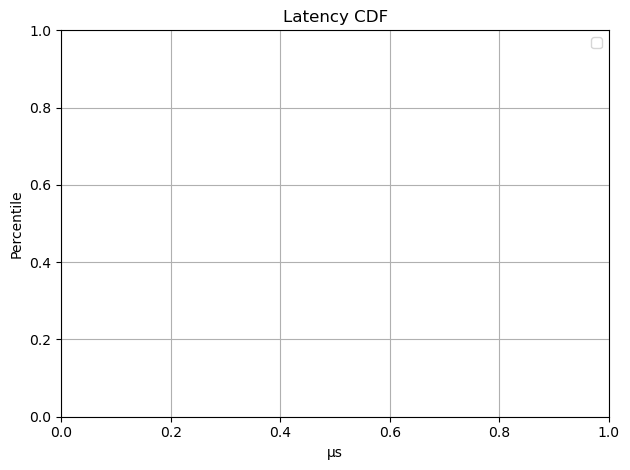

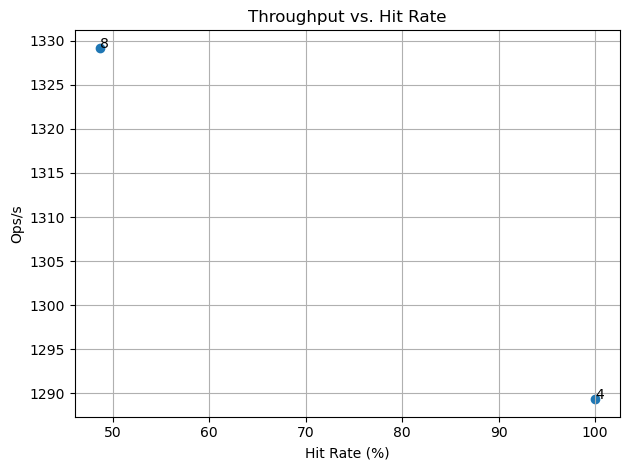

💾 Saving results to → results/simulations/read_heavy_20250607_042617.json
🔖 Results saved → results/simulations/read_heavy_20250607_042617.json
Cleaned up all peers and networks.


In [2]:
run_benchmark(
    name="read_heavy",
    peers=8,
    memory_mb=32,
    value_size=16_384,
    ghost_ratio=0.0,     # every read targets an existing key
    ttl_ratio=0.0,       # no item expires
    scenarios=[(4, 1000), (8, 2000)],
    seed=42,
    plot=True,
)
!pkill -f memcached && rm -rf state/peer/*.json state/network/*.json && echo "Cleaned up all peers and networks."

## Low-Memory / Big Objects (`low_mem_big_obj`)
*Goal.*  Stress the eviction policy by storing 64 KB values in daemons that have only 4 MB of RAM each.  
*Hypothesis.*  Evictions spike quickly; hit-rate collapses once the working set exceeds capacity; resident bytes hover just under the 4 MB limit.



▶ Stage: 1 workers × 200 req
{
  "workers": 1,
  "reqs": 200,
  "ops": 400,
  "dur": 0.2588467909954488,
  "thr": 1545.3156612902842,
  "lat_avg": 508.58851549295775,
  "lat_p95": 947.375,
  "hits": 101,
  "misses": 54,
  "hit_rate": 0.6516129032258065,
  "evictions": 52,
  "bytes": 19977926
}

▶ Stage: 2 workers × 400 req
{
  "workers": 2,
  "reqs": 400,
  "ops": 1600,
  "dur": 0.5024994580016937,
  "thr": 3184.0830363534583,
  "lat_avg": 538.3001631799164,
  "lat_p95": 969.959,
  "hits": 106,
  "misses": 528,
  "hit_rate": 0.167192429022082,
  "evictions": 939,
  "bytes": 20234079
}

🔧 Configuration:
{
  "name": "low_mem_big_obj",
  "peers": 5,
  "memory_mb": 4,
  "value_size": 64000,
  "ghost_ratio": 0.15,
  "ttl_ratio": 0.25,
  "scenarios": [
    [
      1,
      200
    ],
    [
      2,
      400
    ]
  ],
  "seed": 42
}
🖼️ Saved plot → results/plots/low_mem_big_obj_throughput.png
🖼️ Saved plot → results/plots/low_mem_big_obj_latency.png
🖼️ Saved plot → results/plots/low_mem_bi

/Users/priyanshumehta/summer/internetsystems/peercache/testing/benchmark.py:295: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


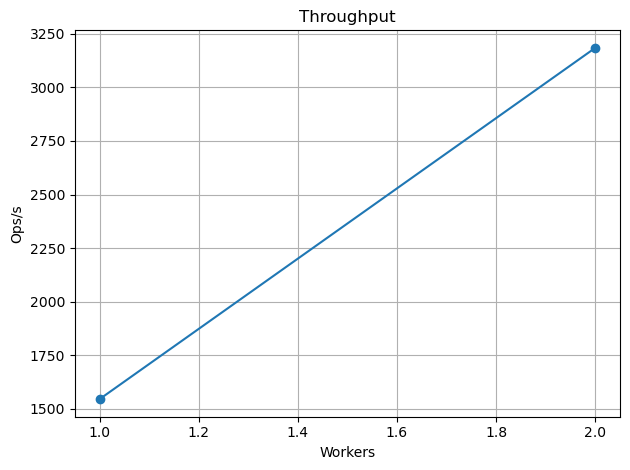

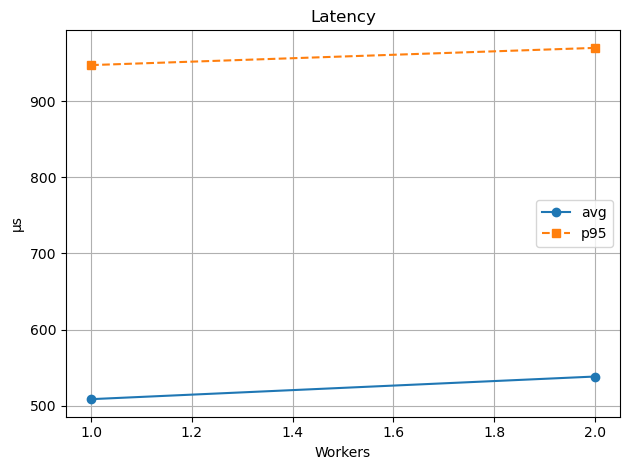

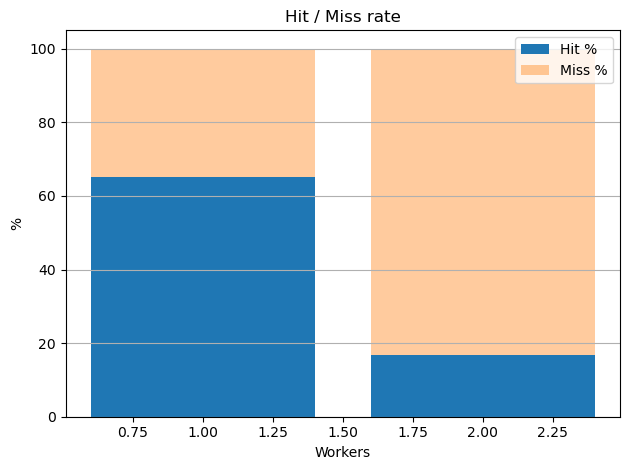

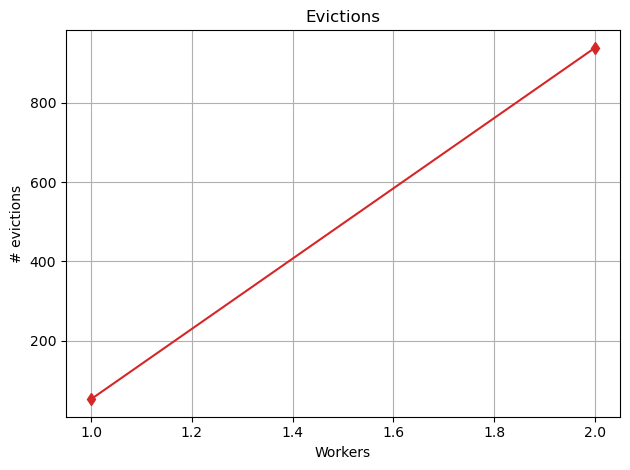

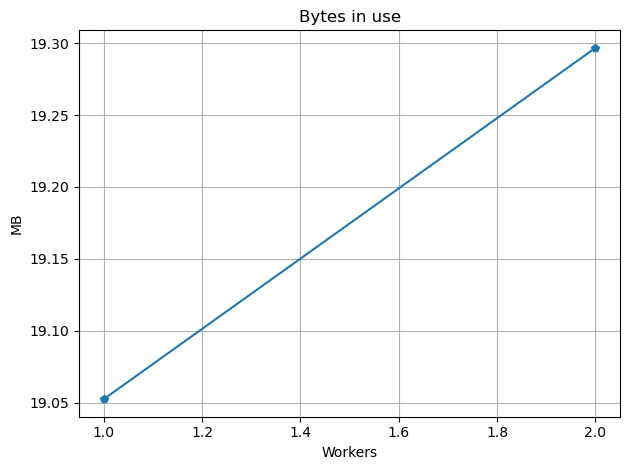

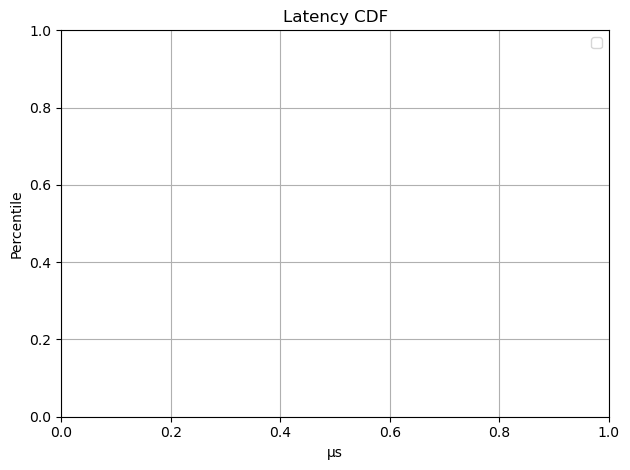

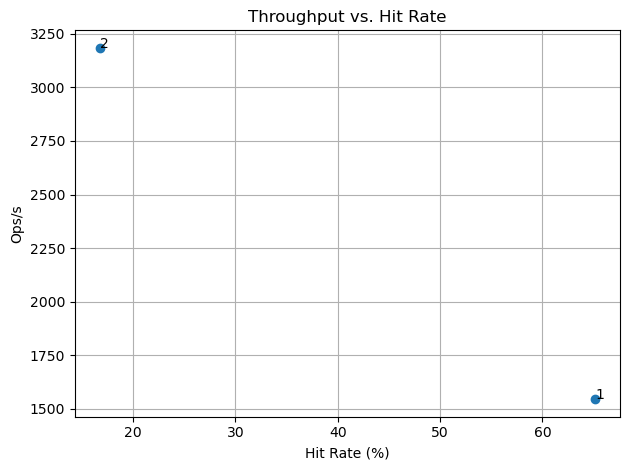

💾 Saving results to → results/simulations/low_mem_big_obj_20250607_042625.json
🔖 Results saved → results/simulations/low_mem_big_obj_20250607_042625.json
Cleaned up all peers and networks.


In [3]:
run_benchmark(
    name="low_mem_big_obj",
    peers=5,
    memory_mb=4,
    value_size=64_000,
    ghost_ratio=0.15,
    ttl_ratio=0.25,
    scenarios=[(1, 200), (2, 400)],
    seed=42,
    plot=True,
)
!pkill -f memcached && rm -rf state/peer/*.json state/network/*.json && echo "Cleaned up all peers and networks."

## Write Burst + Aggressive TTL (`write_burst_ttl`)
*Goal.*  Examine metadata churn when 80 % of writes expire after 2 s, simulating session-token style workloads.  
*Hypothesis.*  Eviction counters remain low (items self-delete), but latency variance increases around expiry windows; memory footprint oscillates rather than trending upward.


▶ Stage: 8 workers × 800 req
{
  "workers": 8,
  "reqs": 800,
  "ops": 12800,
  "dur": 5.964349541987758,
  "thr": 2146.0848177811695,
  "lat_avg": 3657.295493051937,
  "lat_p95": 5615.583,
  "hits": 4243,
  "misses": 871,
  "hit_rate": 0.8296832225263981,
  "evictions": 745,
  "bytes": 93374881
}

▶ Stage: 16 workers × 1600 req
{
  "workers": 16,
  "reqs": 1600,
  "ops": 51200,
  "dur": 22.05734608299099,
  "thr": 2321.2221364872944,
  "lat_avg": 6859.067858274896,
  "lat_p95": 10705.417,
  "hits": 3530,
  "misses": 16931,
  "hit_rate": 0.1725233370802991,
  "evictions": 27723,
  "bytes": 93051582
}

▶ Stage: 32 workers × 3200 req
{
  "workers": 32,
  "reqs": 3200,
  "ops": 204800,
  "dur": 91.93708162501571,
  "thr": 2227.610408989475,
  "lat_avg": 14351.000718073336,
  "lat_p95": 22966.666,
  "hits": 2431,
  "misses": 79529,
  "hit_rate": 0.029660810151293314,
  "evictions": 134185,
  "bytes": 94452126
}

🔧 Configuration:
{
  "name": "write_burst_ttl",
  "peers": 6,
  "memory_mb": 

/Users/priyanshumehta/summer/internetsystems/peercache/testing/benchmark.py:295: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


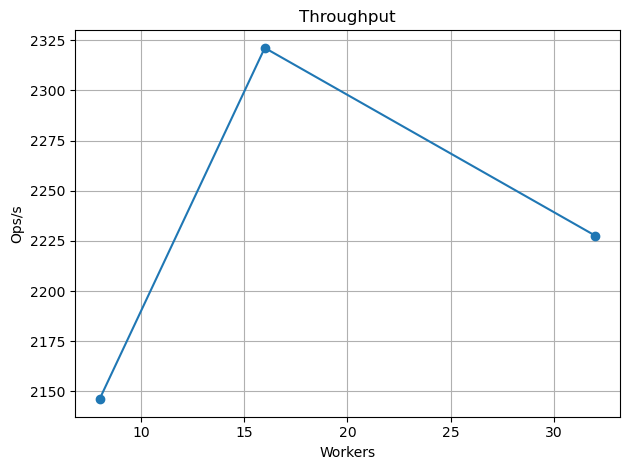

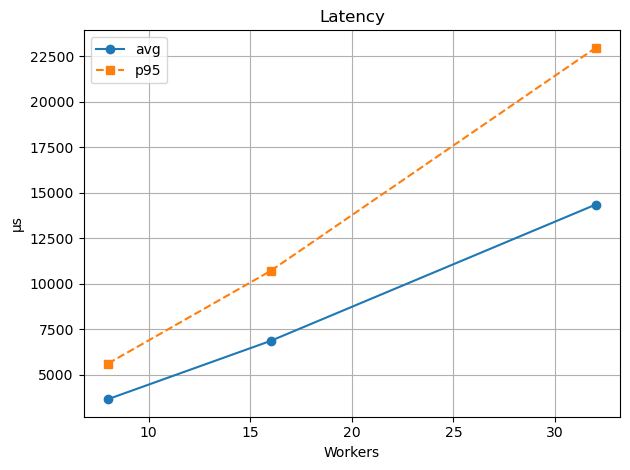

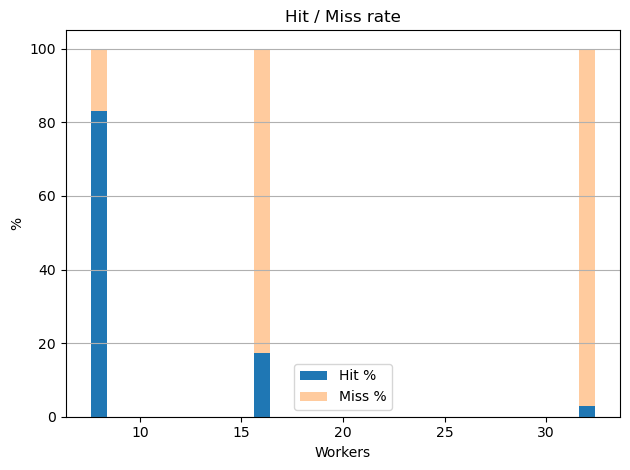

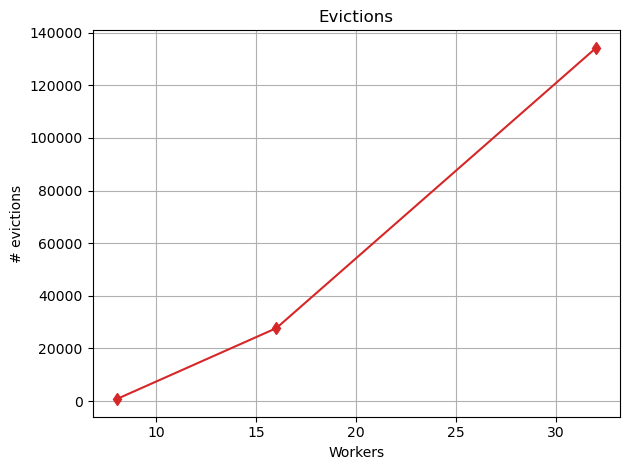

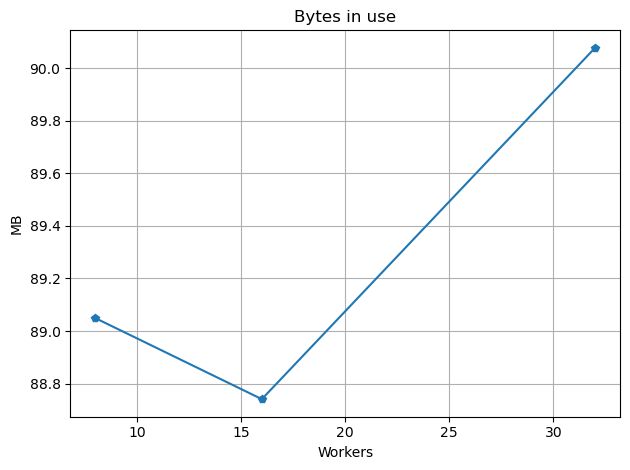

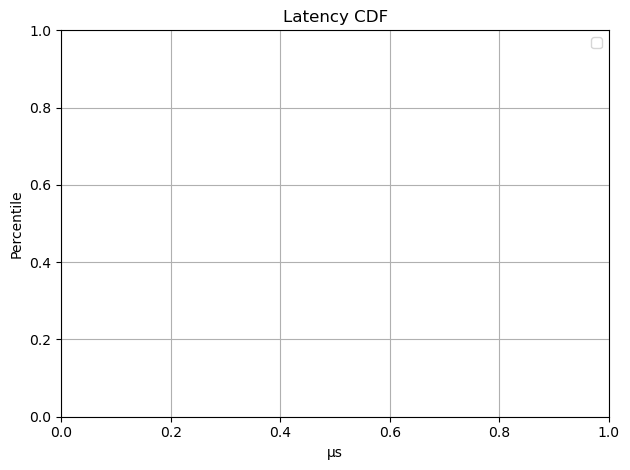

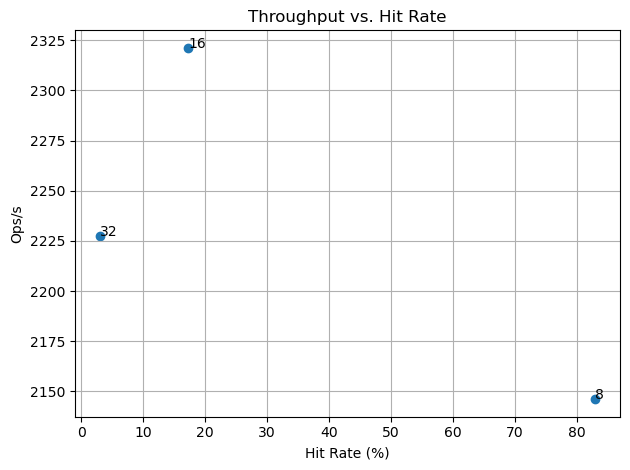

💾 Saving results to → results/simulations/write_burst_ttl_20250607_042834.json
🔖 Results saved → results/simulations/write_burst_ttl_20250607_042834.json
Cleaned up all peers and networks.


In [4]:
run_benchmark(
    name="write_burst_ttl",
    peers=6,
    memory_mb=16,
    value_size=8_192,
    ghost_ratio=0.05,
    ttl_ratio=0.80,
    scenarios=[(8, 800), (16, 1600), (32, 3200)],
    seed=42,
    plot=True,
)
!pkill -f memcached && rm -rf state/peer/*.json state/network/*.json && echo "Cleaned up all peers and networks."